In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Taylor series expansion of the sigmoid
$ g(x) =  \frac{1}{1 + e^{-x}} $

$ g'(x)  = g(x) (1-g(x)) $

$ g''(x)  = g(x) (1 - g(x)) (1 - 2 g(x))$

$ g'''(x)  = g(x) (1 - g(x)) (1 - 2 g(x)) (1 - 4 g(x))$



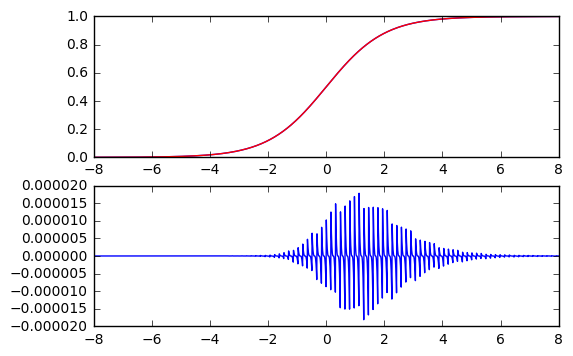

In [2]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sig_taylor(x, xo, fo):
    """Sigmoid taylor series expansion around xo, order 3"""
    # note: fo = sigmoid(xo)
    fp = fo*(1-fo)
    fpp = fp*(1-2*fo)
    fppp = fpp*(1-4*fo)
    d = x-xo
    y = fo + fp*d + 0.5*fpp*d**2 + (1.0/6.0)*fppp*d**3
    return y

# Want to evaluate sigmoid here
x = np.linspace(-8,8,2000)

# Store a lookup table at a small number of points
z = np.linspace(-8,8,100)
s = sigmoid(z)

# Interpolate using the taylor series
sig_hat = np.zeros(x.shape)
for n in range(len(x)):
    # find nearest point in the lookup table
    nearest = np.abs(z-x[n]).argmin()
    xo = z[nearest]
    fo = s[nearest]
    # evaluate the expansion
    sig_hat[n] = sig_taylor(x[n], xo, fo)

plt.figure()
plt.subplot(2,1,1)
plt.plot(x, sigmoid(x), 'b', x, sig_hat, 'r')
plt.subplot(2,1,2)
plt.plot(x, sigmoid(x) - sig_hat)

In [3]:
# if abs(x) > 8 we can use 1 (or 0) to better than 3 digits
print(1.0 - sigmoid(8))

# if abs(x) > 10 we can use 1 (or 0) to better than 4 digits
print(1.0 - sigmoid(10))


0.000335350130466
4.53978687024e-05
